In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pyodbc
import numpy as np

In [3]:
df = pd.read_csv('input/2023Jan1-2023Nov30AmznSalesReportR.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45981 entries, 0 to 45980
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date/time                 45981 non-null  object 
 1   settlement id             45981 non-null  int64  
 2   type                      45981 non-null  object 
 3   order id                  45609 non-null  object 
 4   sku                       33477 non-null  object 
 5   description               45981 non-null  object 
 6   quantity                  33325 non-null  float64
 7   marketplace               33422 non-null  object 
 8   account type              45981 non-null  object 
 9   fulfillment               33100 non-null  object 
 10  order city                33094 non-null  object 
 11  order state               33054 non-null  object 
 12  order postal              33093 non-null  object 
 13  tax collection model      30232 non-null  object 
 14  produc

In [5]:
df['product sales']=df['product sales'].apply(lambda x: x.replace(',',''))
df['product sales'] = df['product sales'].astype(float)

In [6]:
df['other']=df['other'].apply(lambda x: x.replace(',',''))
df['other'] = df['other'].astype(float)

In [7]:
df['total']=df['total'].apply(lambda x: x.replace(',',''))
df['total'] = df['total'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45981 entries, 0 to 45980
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date/time                 45981 non-null  object 
 1   settlement id             45981 non-null  int64  
 2   type                      45981 non-null  object 
 3   order id                  45609 non-null  object 
 4   sku                       33477 non-null  object 
 5   description               45981 non-null  object 
 6   quantity                  33325 non-null  float64
 7   marketplace               33422 non-null  object 
 8   account type              45981 non-null  object 
 9   fulfillment               33100 non-null  object 
 10  order city                33094 non-null  object 
 11  order state               33054 non-null  object 
 12  order postal              33093 non-null  object 
 13  tax collection model      30232 non-null  object 
 14  produc

In [9]:
fbm = df.loc[df['fulfillment']=='Seller']

In [ ]:
fba = df.loc[df['fulfillment']=='Amazon']

In [ ]:
notfb = df.loc[~(df['fulfillment']=='Amazon') & ~(df['fulfillment']=='Seller')]

* FBM: 13,767  
* FBA: 19,333  

* All: 45,981
* Total: 33,100  

* Missing: 12,881

In [ ]:
noOrderid = df.loc[df['order id'].isnull()]
#noOrderid['description'].unique()

In [10]:
Oid = df.loc[~df['order id'].isnull()]

In [11]:
Oid

,date/time,settlement id,type,order id,sku,description,quantity,marketplace,account type,fulfillment,...,Regulatory Fee,Tax On Regulatory Fee,promotional rebates,promotional rebates tax,marketplace withheld tax,selling fees,fba fees,other transaction fees,other,total
0,"Jan 1, 2023 12:05:51 AM PST",17143526261,Order,114-8903434-9421842,794261051,Markal 61051 Quik Stik Twist Long-Lasting Soli...,1.0,amazon.com,Invoiced Orders,Seller,...,0,0,0.00,0,0.00,-6.60,0.00,0.0,0.0,37.39
1,"Jan 1, 2023 12:07:07 AM PST",17143526261,Order,112-6915314-5588210,794261069,Markal 61069 Quik Stik Twist Long-Lasting Soli...,1.0,amazon.com,Invoiced Orders,Seller,...,0,0,0.00,0,-3.98,-6.45,0.00,0.0,0.0,36.54
2,"Jan 1, 2023 12:07:21 AM PST",17143526261,Order,112-5352665-5232230,261185076,"GEARWRENCH 3/8"" Drive Electronic Torque Wrench...",1.0,amazon.com,Invoiced Orders,Seller,...,0,0,0.00,0,-8.82,-18.90,0.00,0.0,0.0,107.09
3,"Jan 1, 2023 12:09:44 AM PST",17143526261,Order,114-8440835-2746605,859512276,"Weiler 12276 5"" Single Row Knot Wire Cup Brush...",5.0,amazon.com,Invoiced Orders,Seller,...,0,0,0.00,0,0.00,-30.75,0.00,0.0,0.0,174.20
4,"Jan 1, 2023 12:11:27 AM PST",17143526261,Order,114-0207661-8985812,794296961,Markal - 96961 Pro-Line HP High Performance Li...,1.0,amazon.com,Invoiced Orders,Seller,...,0,0,0.00,0,0.00,-4.35,0.00,0.0,0.0,24.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45976,"Nov 30, 2023 11:38:44 PM PST",19201956281,Order,111-1594656-8635414,806088489fba,"3M Xtract Cubitron II Net Disc 710W, 220+, 3 i...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-1.51,-3.12,-4.16,0.0,0.0,13.49
45977,"Nov 30, 2023 11:38:44 PM PST",19201956281,Order,113-2626300-0465837,147512162fba,"Lufkin Shockforce G2 16-ft Nite Eye, Magnetic ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-1.75,-3.74,-5.70,0.0,0.0,15.50
45978,"Nov 30, 2023 11:41:29 PM PST",19201956281,Order,114-4344818-4509042,261185195fba,"GEARWRENCH 3/8"" 120XP Flex Head Electronic Tor...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,-8.56,0,-13.19,-29.31,-11.99,0.0,0.0,154.12
45979,"Nov 30, 2023 11:54:36 PM PST",19201956281,Order,111-6046110-5737833,806088456fba,"Cubitron 3M Xtract Net Disc 710W, 120+, 6 in, ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-3.21,-4.70,-5.70,0.0,0.0,20.96


In [10]:
Oid.type.unique()

array(['Order', 'Refund', 'Shipping Services', 'Adjustment',
       'FBA Inventory Fee', 'Order_Retrocharge', 'Refund_Retrocharge',
       'FBA Customer Return Fee'], dtype=object)

**net profit x avg order cost graph**

need net profit column by order, then sort, then graph

In [11]:
#get all orders
ords = Oid.loc[Oid['type']=='Order']

In [ ]:
noOrderid

In [29]:
ords.type.unique()

array(['Order'], dtype=object)

In [12]:
ords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32515 entries, 0 to 45980
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date/time                 32515 non-null  object 
 1   settlement id             32515 non-null  int64  
 2   type                      32515 non-null  object 
 3   order id                  32515 non-null  object 
 4   sku                       32515 non-null  object 
 5   description               32515 non-null  object 
 6   quantity                  32515 non-null  float64
 7   marketplace               32515 non-null  object 
 8   account type              32515 non-null  object 
 9   fulfillment               32515 non-null  object 
 10  order city                32512 non-null  object 
 11  order state               32472 non-null  object 
 12  order postal              32508 non-null  object 
 13  tax collection model      29705 non-null  object 
 14  product sal

In [ ]:
#get the average cost for each sku (regardless of whse)
#gGb = pd.DataFrame(ords.groupby('order id')['product sales','total','cost'].sum().reset_index()) #,columns=['sku','Unit Cost']

In [ ]:
gGb

In [ ]:
gGb.loc[gGb['order id']=='113-0062350-3723445']

In [13]:
#remove fba suffix 
ords['sku']=ords['sku'].apply(lambda x: str(x)[:9])
ords['sku'].apply(lambda x: len(x)).unique()

C:\Users\rrichesin\AppData\Local\Temp\ipykernel_16072\3073901386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords['sku']=ords['sku'].apply(lambda x: str(x)[:9])


array([9], dtype=int64)

In [14]:
ordCost = pd.read_excel('input/amznCostOrders.xlsx')

In [15]:
ordCost.iloc[:,7:25].sample(10)

,Order Suffix,Warehouse,Customer PO,Reference,Line Number,Entered Date,Shipped Date,Invoice Date,Transaction Type,Customer Product Number,Product Number,"Stock, Special, Non-Stock",Description,Description 2,Qty Shipped,UOM,Unit Cost,Unit Sell Price
27208,0,901A,113-3678237-1471453,NaN,1,2023-11-06,2023-11-06,2023-11-07,SO,NaN,806088461,s,"6""XNH 710W 240+ XTRACT",CUBITRON NET DISC,1,CT,21.30852,37.78
28848,0,901A,112-9892017-4952222,NaN,2,2023-11-14,2023-11-14,2023-11-14,SO,NaN,806088460,s,"6""XNH 710W 220+ XTRACT",CUBITRON NET DISC,1,CT,21.29167,43.53
32239,0,201,112-8412745-1663400,NaN,1,2023-12-06,2023-12-07,2023-12-07,SO,NaN,806088455,NaN,"6""XNH 710W 80+ XTRACT",CUBITRON NET DISC,1,CT,18.24840,37.89
29351,0,201,112-3972007-9700216,NaN,1,2023-11-18,2023-11-20,2023-11-20,SO,NaN,164939565,NaN,175LH RESETTABLE,COMBINATION PADLOCK,1,EA,13.86000,21.99
20998,0,201,113-0679119-6934660,NaN,1,2023-08-27,2023-08-28,2023-08-28,SO,NaN,794296971,NaN,96971 PRO-LINE HP,LIGHT BLUE,1,BX,14.40000,38.00
22421,0,201,113-2910550-0510668,NaN,1,2023-09-11,2023-09-13,2023-09-13,SO,NaN,261184924,NaN,"84924N 10/PC 3/8"" DR.",DEEP UNIVERSAL IMPACT,1,EA,44.80000,71.99
4689,0,201,113-1188034-9577027,NaN,1,2023-02-26,2023-02-28,2023-02-28,SO,NaN,806088471,NaN,"5""XNH 710W 120+ XTRACT",CUBITRON NET DISC,1,CT,12.90560,22.99
33352,0,901A,111-3306240-7969833,NaN,1,2023-12-14,2023-12-14,2023-12-15,SO,NaN,794296270,s,96270 PRO HOLDER,STRT LEAD,1,EA,11.05000,29.24
6055,0,201,112-1716791-5732251,NaN,2,2023-03-07,2023-03-08,2023-03-08,SO,NaN,806088456,NaN,"6""XNH 710W 120+ XTRACT",CUBITRON NET DISC,1,CT,21.46870,31.99
2751,0,201,113-2789228-8289806,NaN,1,2023-01-30,2023-02-01,2023-02-01,SO,NaN,806088462,NaN,"6""XNH 710W 320+ XTRACT",CUBITRON NET DISC,1,CT,20.05320,32.99


In [16]:
ordCost.rename(columns={'Product Number':'sku'}, inplace=True)
cost = ordCost[['sku', 'Unit Cost']]
cost.sample(5)

,sku,Unit Cost
20690,73134805,30.84000
14969,806088470,11.74255
32062,806088471,11.08950
138,806088471,12.90560
20846,806088456,19.26236


In [17]:
#drop returned (RM) orders
cost = cost.loc[cost['Unit Cost']>0]
cost.nunique()

sku          239
Unit Cost    560
dtype: int64

In [18]:
cost_gb = pd.DataFrame(cost.groupby('sku')['Unit Cost'].mean().reset_index(),columns=['sku','Unit Cost'])

In [19]:
cost_gb['sku'] = cost_gb['sku'].astype(str)
#leading zeros
cost_gb['sku'] = cost_gb['sku'].str.zfill(9)

In [20]:
cost_gb.sample(5)

,sku,Unit Cost
136,794261043,48.628857
120,630864373,4.887500
153,794282832,17.160000
141,794261053,25.963318
34,134040320,385.321150


In [21]:
graph = ords.join(cost_gb.set_index('sku'), on='sku')

In [22]:
graph

,date/time,settlement id,type,order id,sku,description,quantity,marketplace,account type,fulfillment,...,Tax On Regulatory Fee,promotional rebates,promotional rebates tax,marketplace withheld tax,selling fees,fba fees,other transaction fees,other,total,Unit Cost
0,"Jan 1, 2023 12:05:51 AM PST",17143526261,Order,114-8903434-9421842,794261051,Markal 61051 Quik Stik Twist Long-Lasting Soli...,1.0,amazon.com,Invoiced Orders,Seller,...,0,0.00,0,0.00,-6.60,0.00,0.0,0.0,37.39,27.466182
1,"Jan 1, 2023 12:07:07 AM PST",17143526261,Order,112-6915314-5588210,794261069,Markal 61069 Quik Stik Twist Long-Lasting Soli...,1.0,amazon.com,Invoiced Orders,Seller,...,0,0.00,0,-3.98,-6.45,0.00,0.0,0.0,36.54,25.680000
2,"Jan 1, 2023 12:07:21 AM PST",17143526261,Order,112-5352665-5232230,261185076,"GEARWRENCH 3/8"" Drive Electronic Torque Wrench...",1.0,amazon.com,Invoiced Orders,Seller,...,0,0.00,0,-8.82,-18.90,0.00,0.0,0.0,107.09,93.872000
3,"Jan 1, 2023 12:09:44 AM PST",17143526261,Order,114-8440835-2746605,859512276,"Weiler 12276 5"" Single Row Knot Wire Cup Brush...",5.0,amazon.com,Invoiced Orders,Seller,...,0,0.00,0,0.00,-30.75,0.00,0.0,0.0,174.20,32.520000
4,"Jan 1, 2023 12:11:27 AM PST",17143526261,Order,114-0207661-8985812,794296961,Markal - 96961 Pro-Line HP High Performance Li...,1.0,amazon.com,Invoiced Orders,Seller,...,0,0.00,0,0.00,-4.35,0.00,0.0,0.0,24.64,14.844840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45976,"Nov 30, 2023 11:38:44 PM PST",19201956281,Order,111-1594656-8635414,806088489,"3M Xtract Cubitron II Net Disc 710W, 220+, 3 i...",1.0,amazon.com,Standard Orders,Amazon,...,0,0.00,0,-1.51,-3.12,-4.16,0.0,0.0,13.49,8.732157
45977,"Nov 30, 2023 11:38:44 PM PST",19201956281,Order,113-2626300-0465837,147512162,"Lufkin Shockforce G2 16-ft Nite Eye, Magnetic ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0.00,0,-1.75,-3.74,-5.70,0.0,0.0,15.50,11.840000
45978,"Nov 30, 2023 11:41:29 PM PST",19201956281,Order,114-4344818-4509042,261185195,"GEARWRENCH 3/8"" 120XP Flex Head Electronic Tor...",1.0,amazon.com,Standard Orders,Amazon,...,0,-8.56,0,-13.19,-29.31,-11.99,0.0,0.0,154.12,139.657733
45979,"Nov 30, 2023 11:54:36 PM PST",19201956281,Order,111-6046110-5737833,806088456,"Cubitron 3M Xtract Net Disc 710W, 120+, 6 in, ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0.00,0,-3.21,-4.70,-5.70,0.0,0.0,20.96,20.315975


In [ ]:
cost.loc[cost['sku']==261184939].mean()

In [23]:
graph['type'].unique()

array(['Order'], dtype=object)

In [25]:
graph['Extended Cost'] = graph['quantity'] * graph['Unit Cost']

In [26]:
subset = graph[['order id', 'product sales', 'total','Extended Cost']]

In [27]:
subset.sample(5)

,order id,product sales,total,Extended Cost
38043,113-2323176-0498634,30.13,25.61,13.560000
15268,113-0916477-4300246,25.98,-49.19,14.377216
15818,112-4189359-7644267,22.99,15.30,12.307453
32537,111-7955557-1745847,48.09,36.13,27.466182
10666,112-5229825-5670626,31.99,27.19,20.315975


113-0916477-4300246	

In [97]:
aoc = pd.DataFrame(subset.groupby('order id').sum().reset_index()) #,columns=['sku','Unit Cost']

In [98]:
aoc

,order id,product sales,total,Extended Cost
0,111-0001136-4669806,28.99,24.64,15.398717
1,111-0001813-9332213,22.99,14.79,11.728623
2,111-0004683-4057834,27.99,18.76,14.844840
3,111-0007753-3202628,22.99,14.79,12.170029
4,111-0007910-7965852,57.08,39.02,24.340059
...,...,...,...,...
26539,114-9995930-2243459,31.99,21.79,19.920409
26540,114-9997059-4941841,68.99,58.64,45.957746
26541,114-9998536-4929048,33.99,28.89,19.723486
26542,114-9998997-7110656,40.03,34.03,20.583750


In [99]:
aoc['order id'].nunique()

26544

In [100]:
aoc.drop(26543,inplace=True)

In [101]:
aoc['order id'].nunique()

26543

In [102]:
aoc['net profit'] = aoc['total'] - aoc['Extended Cost']

In [103]:
aoc

,order id,product sales,total,Extended Cost,net profit
0,111-0001136-4669806,28.99,24.64,15.398717,9.241283
1,111-0001813-9332213,22.99,14.79,11.728623,3.061377
2,111-0004683-4057834,27.99,18.76,14.844840,3.915160
3,111-0007753-3202628,22.99,14.79,12.170029,2.619971
4,111-0007910-7965852,57.08,39.02,24.340059,14.679941
...,...,...,...,...,...
26538,114-9993425-3445016,23.69,15.09,11.728623,3.361377
26539,114-9995930-2243459,31.99,21.79,19.920409,1.869591
26540,114-9997059-4941841,68.99,58.64,45.957746,12.682254
26541,114-9998536-4929048,33.99,28.89,19.723486,9.166514


In [104]:
aoc.loc[aoc['order id']=='113-0916477-4300246']

,order id,product sales,total,Extended Cost,net profit
13719,113-0916477-4300246,779.4,408.0,431.316482,-23.316482


In [105]:
aoc.sort_values(by='product sales',inplace=True)

In [106]:
aoc.drop(aoc[aoc['product sales']==0].index, inplace = True)

In [107]:
aoc.loc[aoc['net profit']<0]

,order id,product sales,total,Extended Cost,net profit
9555,112-4663755-0138650,11.98,5.94,7.188608,-1.248608
6314,111-9658688-9472249,12.42,10.56,37.320000,-26.760000
7238,112-1079953-5997044,12.42,10.56,37.320000,-26.760000
26384,114-9767170-6777048,12.42,10.56,37.320000,-26.760000
14156,113-1511154-5823466,12.99,6.80,7.188608,-0.388608
...,...,...,...,...,...
11426,112-7511983-9962605,689.70,586.20,637.130100,-50.930100
13719,113-0916477-4300246,779.40,408.00,431.316482,-23.316482
8284,112-2753974-3552240,779.94,662.94,690.549095,-27.609095
20543,114-0907007-4333058,974.25,510.00,539.145602,-29.145602


In [108]:
aoc

,order id,product sales,total,Extended Cost,net profit
4396,111-6781310-9496253,9.95,8.76,2.840000,5.920000
11615,112-7798225-2958658,9.95,8.76,2.840000,5.920000
25314,114-8111051-2040244,9.95,8.76,2.840000,5.920000
19650,113-9584395-3142651,9.95,8.76,2.840000,5.920000
14208,113-1585253-7527423,9.95,8.76,2.840000,5.920000
...,...,...,...,...,...
16529,113-5051614-4987429,2249.50,1912.00,1298.165908,613.834092
1531,111-2354003-3664261,2293.70,1949.55,1440.289581,509.260419
6421,111-9824147-9100229,2515.38,2137.98,1614.301293,523.678707
15158,113-3034770-5779419,3379.98,2872.98,2153.180000,719.800000


<Axes: >

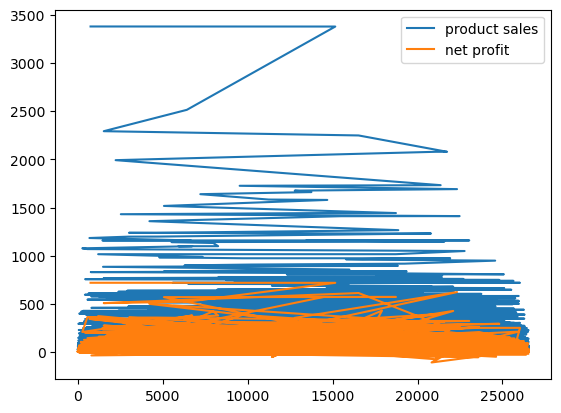

In [46]:
aoc[['product sales', 'net profit']].plot()

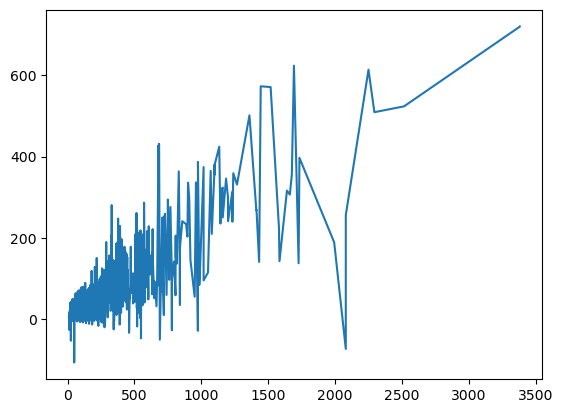

In [47]:
fig, ax = plt.subplots()
x = aoc['product sales']
y = aoc['net profit']
ax.plot(x,y)

In [ ]:
aoc.info()

In [ ]:
aocFocus = aoc.loc[(aoc['product sales'] < 700) & (aoc['product sales'] > 100)]

In [ ]:
aocFocus.info()

In [109]:
aocFocus = aoc

In [50]:
aocFocus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26472 entries, 4396 to 753
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order id       26472 non-null  object 
 1   product sales  26472 non-null  float64
 2   total          26472 non-null  float64
 3   Extended Cost  26472 non-null  float64
 4   net profit     26472 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


In [110]:
aocZ = aocFocus[(np.abs(aocFocus['product sales']-aocFocus['product sales'].mean())<=(2 * aocFocus['product sales'].std())) & (np.abs(aocFocus['net profit']-aocFocus['net profit'].mean())<=(2 * aocFocus['net profit'].std()))]

In [111]:
aocFocus['product sales'].mean()

63.87534640374735

In [112]:
aocFocus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26472 entries, 4396 to 753
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order id       26472 non-null  object 
 1   product sales  26472 non-null  float64
 2   total          26472 non-null  float64
 3   Extended Cost  26472 non-null  float64
 4   net profit     26472 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


C:\Users\rrichesin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rrichesin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rrichesin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rrichesin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

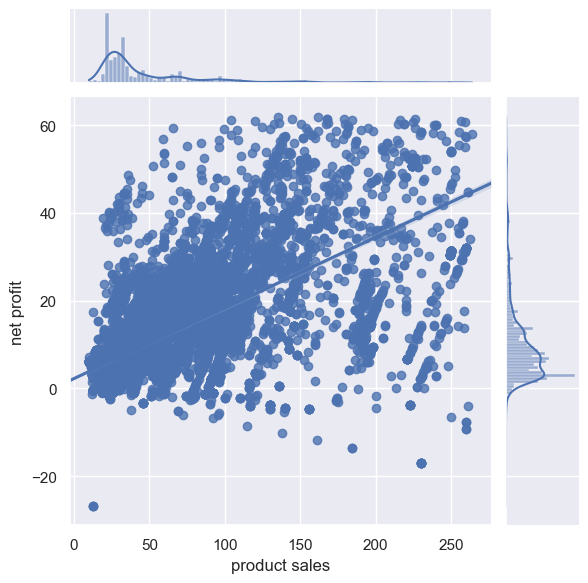

In [114]:
import seaborn as sns
sns.set_theme(style="darkgrid")


g = sns.jointplot(x='product sales', y='net profit', data=aocZ,
                  kind="reg", truncate=False)

In [ ]:
#fig = g.get_figure()
g.savefig('jointplot.png')  

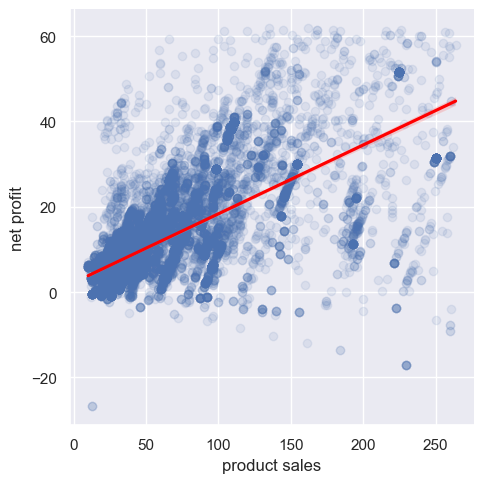

In [141]:
#df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
#fig, ax = plt.subplots()#figsize=(16,10), dpi= 80  
g2= sns.lmplot(x='product sales', y='net profit', data=aocZ, scatter_kws={'alpha': 0.1}, line_kws={'color':'red'})

In [142]:
#g2.savefig('lmplot.png') 
#(x='product sales', y='net profit', data=aocZ

y=0.1611813188143287x+2.2262241130583202


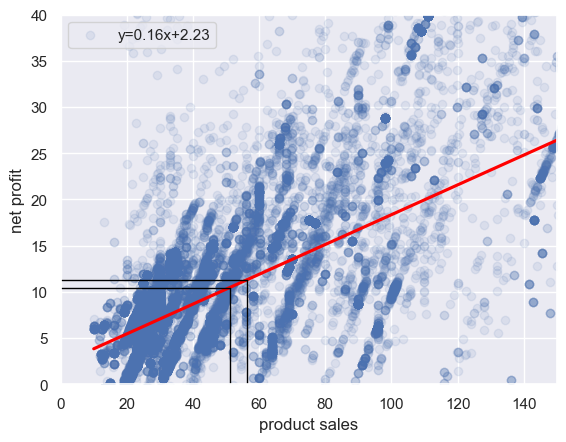

In [200]:
from scipy import stats

#rename aocZ columns so labels make sense
aocZ.rename(columns={'product sales': 'Order Value', 'net profit': 'Order Net Profit'},inplace=True)

slope, intercept, r_value, pv, se = stats.linregress(aocZ['Order Value'], aocZ['Order Net Profit'])
print(f'y={slope}x+{intercept}')


sns.regplot(x='product sales', y='net profit', data=aocZ, 
  ci=None, scatter_kws={'alpha': 0.1}, line_kws={'color':'red'}, label=f'y={round(slope,2)}x+{round(intercept,2)}').legend(loc="best")
plt.plot([51.15,51.15], [10.414, -20], linewidth=1,color='black')
plt.plot([0,51.15], [10.414,10.414], linewidth=1,color='black')

plt.plot([56.27,56.27], [11.24, -20], linewidth=1,color='black')
plt.plot([0,56.27], [11.24,11.24], linewidth=1,color='black')

plt.xlim(0,150)
plt.ylim(0,40)
#plt.savefig('lmplotreg.png') 


In terms of standardized orders (within 3 std's):
Current AOV of $51.15 gives us a Average net profit of $10.41
If we increase the AOV by 10% ($5.12) to $56.27 we increase our average net profit to 11.23$
which increases our annual net profit by 8%  
We do this by _____

**NOT STANDARDIZED**  
Current AOV of $63.7 gives us a Average net profit of $12.44  
If we increase the AOV by 5% ($3.19) to $66.89 we increase our net profit to $12.93  
which increases our annual sales  
We do this by _____  

3 options here:
* Continue to go by order level: must figure out why there are 700 missing from sx (could be bulk orders) and how to drop cost for all items but one.
* Go by Item: Fix the leading zeros in the cost df Order Number column and remove the 'fba' suffix in the sku column of the fbm df <-thinking this is the best option.
* Find oeio on ad hoc sx query

In [12]:
ifba = Oid.loc[Oid['fulfillment']=='Amazon']

In [13]:
ifba

,date/time,settlement id,type,order id,sku,description,quantity,marketplace,account type,fulfillment,...,Regulatory Fee,Tax On Regulatory Fee,promotional rebates,promotional rebates tax,marketplace withheld tax,selling fees,fba fees,other transaction fees,other,total
16,"Jan 1, 2023 8:13:26 PM PST",17143526261,Order,113-0597596-1010624,794296966fba,Markal - 96966 Pro-Line HP High Performance Li...,1.0,amazon.com,Invoiced Orders,Amazon,...,0,0,0.00,0,-1.68,-4.20,-5.06,0.0,0.0,18.73
17,"Jan 1, 2023 11:09:19 PM PST",17149362761,Order,114-1237401-5494660,073134801fba,PIP 34-800/XL MaxiFoam G-Tek Premium Nitrile F...,1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-3.43,-7.35,-5.71,0.0,0.0,35.93
19,"Jan 2, 2023 1:35:02 AM PST",17149362761,Order,112-8442762-2924213,806088471fba,"3M Xtract Cubitron II Net Disc 710W, 120+, 5 i...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,0.00,-3.30,-5.06,0.0,0.0,13.63
21,"Jan 2, 2023 4:29:46 AM PST",17149362761,Order,114-6930593-8312219,806088455fba,"3M Xtract Cubitron II Net Disc 710W, 80+, 6 in...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-1.51,-4.80,-5.71,0.0,0.0,21.48
22,"Jan 2, 2023 4:53:50 AM PST",17149362761,Order,112-8442762-2924213,806088476fba,"3M Xtract Cubitron II Net Disc 710W, 320+, 5 i...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,0.00,-3.30,-4.27,0.0,0.0,14.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45976,"Nov 30, 2023 11:38:44 PM PST",19201956281,Order,111-1594656-8635414,806088489fba,"3M Xtract Cubitron II Net Disc 710W, 220+, 3 i...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-1.51,-3.12,-4.16,0.0,0.0,13.49
45977,"Nov 30, 2023 11:38:44 PM PST",19201956281,Order,113-2626300-0465837,147512162fba,"Lufkin Shockforce G2 16-ft Nite Eye, Magnetic ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-1.75,-3.74,-5.70,0.0,0.0,15.50
45978,"Nov 30, 2023 11:41:29 PM PST",19201956281,Order,114-4344818-4509042,261185195fba,"GEARWRENCH 3/8"" 120XP Flex Head Electronic Tor...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,-8.56,0,-13.19,-29.31,-11.99,0.0,0.0,154.12
45979,"Nov 30, 2023 11:54:36 PM PST",19201956281,Order,111-6046110-5737833,806088456fba,"Cubitron 3M Xtract Net Disc 710W, 120+, 6 in, ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0,0.00,0,-3.21,-4.70,-5.70,0.0,0.0,20.96


In [14]:
#remove fba suffix 
ifba['sku']=ifba['sku'].apply(lambda x: str(x)[:9])

C:\Users\rrichesin\AppData\Local\Temp\ipykernel_24484\894456395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifba['sku']=ifba['sku'].apply(lambda x: str(x)[:9])


In [15]:
ifba['sku'].apply(lambda x: len(x)).unique()

array([9], dtype=int64)

**So now that ifba df ['sku'] columns is good format the cost df**

In [16]:

ordCost = pd.read_excel('input/amznCostOrders.xlsx')

In [17]:
ordCost.iloc[:,7:25].sample(10)

,Order Suffix,Warehouse,Customer PO,Reference,Line Number,Entered Date,Shipped Date,Invoice Date,Transaction Type,Customer Product Number,Product Number,"Stock, Special, Non-Stock",Description,Description 2,Qty Shipped,UOM,Unit Cost,Unit Sell Price
18216,0,901A,112-0820724-0452247,NaN,1,2023-07-29,2023-07-29,2023-07-31,SO,NaN,806088460,s,"6""XNH 710W 220+ XTRACT",CUBITRON NET DISC,1,CT,21.29167,31.32
23650,0,201,111-4518678-7402619,NaN,1,2023-09-24,2023-09-25,2023-09-25,SO,NaN,794296821,NaN,96821 YELLOW VALVE,ACTION PAINT MARKER,1,BX,13.56000,22.60
23616,0,901A,111-5919620-9133020,NaN,1,2023-09-24,2023-09-24,2023-09-25,SO,NaN,806088474,s,"5""XNH 710W 220+ XTRACT",CUBITRON NET DISC,1,CT,12.45904,29.40
19774,0,201,113-0082326-4836243,NaN,1,2023-08-12,2023-08-15,2023-08-15,SO,NaN,794296270,s,96270 PRO HOLDER,STRT LEAD,1,EA,11.05000,23.66
19142,0,901A,113-9544890-8166600,NaN,2,2023-08-08,2023-08-08,2023-08-08,SO,NaN,806088470,s,"5""XNH 710W 80+ XTRACT",CUBITRON DISC 66580,1,CT,11.74255,27.99
20747,0,901A,111-9837939-0765020,NaN,1,2023-08-24,2023-08-24,2023-08-25,SO,NaN,806088471,s,"5""XNH 710W 120+ XTRACT",CUBITRON NET DISC,1,CT,11.69226,22.50
12037,0,901A,114-6254312-2513840,NaN,1,2023-05-19,2023-05-19,2023-05-19,SO,NaN,794261070,s,61070 QUIK STIX BLUE,NaN,1,BX,25.68000,42.99
15036,0,901A,114-9816840-0903448,NaN,1,2023-06-17,2023-06-17,2023-06-19,SO,NaN,806088470,s,"5""XNH 710W 80+ XTRACT",CUBITRON DISC 66580,1,CT,11.74255,26.05
621,0,901A,113-3645236-8282627,NaN,1,2023-01-08,2023-01-08,2023-01-09,SO,NaN,806088460,s,"6""XNH 710W 220+ XTRACT",CUBITRON NET DISC,1,CT,19.21740,31.99
31916,0,901A,111-3008523-1164259,NaN,1,2023-12-05,2023-12-05,2023-12-06,SO,NaN,806088472,s,"5""XNH 710W 150+ XTRACT",CUBITRON NET DISC,1,CT,11.70675,25.69


In [18]:
ordCost.rename(columns={'Product Number':'sku'}, inplace=True)
cost = ordCost[['sku', 'Unit Cost']]


In [19]:
cost.sample(5)

,sku,Unit Cost
15883,806088475,10.97000
25201,794296961,15.48000
29616,806088476,12.90560
17844,806088462,19.66983
9377,806088476,11.12451


In [20]:
#drop returned (RM) orders
cost = cost.loc[cost['Unit Cost']>0]

In [21]:
cost.nunique()

sku          239
Unit Cost    560
dtype: int64

In [22]:
#get the average cost for each sku (regardless of whse)
cost_gb = pd.DataFrame(cost.groupby('sku')['Unit Cost'].mean().reset_index(),columns=['sku','Unit Cost'])

In [23]:
cost_gb.info() #both objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sku        239 non-null    object 
 1   Unit Cost  239 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [24]:
cost_gb['sku'] = cost_gb['sku'].astype(str)

In [25]:
#leading zeros
cost_gb['sku'] = cost_gb['sku'].str.zfill(9)

In [26]:
cost_gb.loc[cost_gb['sku']=='073134803']

,sku,Unit Cost
16,073134803,30.84


In [27]:
both_fba = ifba.join(cost_gb.set_index('sku'), on='sku')

In [28]:
both_fba.sample(1)

,date/time,settlement id,type,order id,sku,description,quantity,marketplace,account type,fulfillment,...,Tax On Regulatory Fee,promotional rebates,promotional rebates tax,marketplace withheld tax,selling fees,fba fees,other transaction fees,other,total,Unit Cost
44935,"Nov 22, 2023 4:39:38 PM PST",19109171271,Order,113-5401804-2424245,147512162,"Lufkin Shockforce G2 16-ft Nite Eye, Magnetic ...",1.0,amazon.com,Standard Orders,Amazon,...,0,0.0,0,-1.48,-3.71,0.0,0.0,0.0,20.99,11.84


In [29]:
both_fba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19333 entries, 16 to 45980
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date/time                 19333 non-null  object 
 1   settlement id             19333 non-null  int64  
 2   type                      19333 non-null  object 
 3   order id                  19333 non-null  object 
 4   sku                       19333 non-null  object 
 5   description               19333 non-null  object 
 6   quantity                  19333 non-null  float64
 7   marketplace               19333 non-null  object 
 8   account type              19333 non-null  object 
 9   fulfillment               19333 non-null  object 
 10  order city                19327 non-null  object 
 11  order state               19287 non-null  object 
 12  order postal              19326 non-null  object 
 13  tax collection model      16912 non-null  object 
 14  product sa

In [30]:
#now multiply the each item cost by the qty shipped for each item


In [31]:
both_fba['Extended Cost'] = both_fba['quantity'] * both_fba['Unit Cost']

In [32]:
both_fba.iloc[:,14:]

,product sales,product sales tax,shipping credits,shipping credits tax,gift wrap credits,giftwrap credits tax,Regulatory Fee,Tax On Regulatory Fee,promotional rebates,promotional rebates tax,marketplace withheld tax,selling fees,fba fees,other transaction fees,other,total,Unit Cost,Extended Cost
16,27.99,1.68,0.00,0.0,0.0,0.0,0,0,0.00,0,-1.68,-4.20,-5.06,0.0,0.0,18.73,15.366171,15.366171
17,48.99,3.43,0.00,0.0,0.0,0.0,0,0,0.00,0,-3.43,-7.35,-5.71,0.0,0.0,35.93,30.322755,30.322755
19,21.99,0.00,0.00,0.0,0.0,0.0,0,0,0.00,0,0.00,-3.30,-5.06,0.0,0.0,13.63,11.728623,11.728623
21,31.99,1.51,0.00,0.0,0.0,0.0,0,0,0.00,0,-1.51,-4.80,-5.71,0.0,0.0,21.48,19.302393,19.302393
22,21.99,0.00,0.00,0.0,0.0,0.0,0,0,0.00,0,0.00,-3.30,-4.27,0.0,0.0,14.42,11.750324,11.750324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45976,20.77,1.51,0.00,0.0,0.0,0.0,0,0,0.00,0,-1.51,-3.12,-4.16,0.0,0.0,13.49,8.732157,8.732157
45977,24.94,1.75,0.00,0.0,0.0,0.0,0,0,0.00,0,-1.75,-3.74,-5.70,0.0,0.0,15.50,11.840000,11.840000
45978,195.42,13.19,8.56,0.0,0.0,0.0,0,0,-8.56,0,-13.19,-29.31,-11.99,0.0,0.0,154.12,139.657733,139.657733
45979,31.36,3.21,0.00,0.0,0.0,0.0,0,0,0.00,0,-3.21,-4.70,-5.70,0.0,0.0,20.96,20.315975,20.315975


In [33]:
both_fba.loc[both_fba['sku']=='794296966']

,date/time,settlement id,type,order id,sku,description,quantity,marketplace,account type,fulfillment,...,promotional rebates,promotional rebates tax,marketplace withheld tax,selling fees,fba fees,other transaction fees,other,total,Unit Cost,Extended Cost
16,"Jan 1, 2023 8:13:26 PM PST",17143526261,Order,113-0597596-1010624,794296966,Markal - 96966 Pro-Line HP High Performance Li...,1.0,amazon.com,Invoiced Orders,Amazon,...,0.0,0,-1.68,-4.20,-5.06,0.0,0.0,18.73,15.366171,15.366171
6130,"Feb 9, 2023 12:28:33 PM PST",17390577031,Order,112-1076072-2557854,794296966,Markal - 96966 Pro-Line HP High Performance Li...,1.0,amazon.com,Standard Orders,Amazon,...,0.0,0,-1.81,-4.35,-5.03,0.0,0.0,19.61,15.366171,15.366171
6267,"Feb 10, 2023 11:08:24 AM PST",17390577031,Order,112-3271168-0745815,794296966,Markal - 96966 Pro-Line HP High Performance Li...,1.0,amazon.com,Standard Orders,Amazon,...,-3.8,0,-2.03,-4.35,-5.03,0.0,0.0,19.61,15.366171,15.366171
7417,"Feb 20, 2023 6:18:17 PM PST",17390577031,Order,113-4432381-9781017,794296966,Markal - 96966 Pro-Line HP High Performance Li...,1.0,amazon.com,Standard Orders,Amazon,...,0.0,0,-2.10,-4.20,-5.03,0.0,0.0,18.76,15.366171,15.366171
7730,"Feb 21, 2023 6:35:47 PM PST",17466329531,Order,113-8529068-1333822,794296966,Markal - 96966 Pro-Line HP High Performance Li...,1.0,amazon.com,Standard Orders,Amazon,...,0.0,0,0.00,-4.20,-5.03,0.0,0.0,18.76,15.366171,15.366171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44601,"Nov 20, 2023 1:55:10 PM PST",19109171271,Order,114-4449767-5705822,794296966,Markal 96966- Paint-Riter+ Oily Surface Liquid...,2.0,amazon.com,Standard Orders,Amazon,...,0.0,0,-17.35,-31.50,-10.66,0.0,0.0,31.43,15.366171,30.732343
44602,"Nov 20, 2023 1:55:10 PM PST",19109171271,Order,114-4449767-5705822,794296966,Markal 96966- Paint-Riter+ Oily Surface Liquid...,3.0,amazon.com,Standard Orders,Amazon,...,0.0,0,0.00,0.00,-15.99,0.0,0.0,120.42,15.366171,46.098514
44775,"Nov 21, 2023 3:51:27 PM PST",19109171271,Order,113-3076625-0625051,794296966,Markal 96966- Paint-Riter+ Oily Surface Liquid...,1.0,amazon.com,Standard Orders,Amazon,...,0.0,0,-4.10,-6.30,-5.33,0.0,0.0,30.37,15.366171,15.366171
44917,"Nov 22, 2023 1:28:39 PM PST",19109171271,Order,113-4516466-9527458,794296966,Markal 96966- Paint-Riter+ Oily Surface Liquid...,1.0,amazon.com,Standard Orders,Amazon,...,0.0,0,-3.19,-6.17,-5.33,0.0,0.0,29.66,15.366171,15.366171


In [ ]:
#both_fba.to_excel('fbaWithCosts.xlsx')

In [34]:
#get all refunds to add to table later
fba_refunds = df.loc[(df['fulfillment']=='Amazon') & (df['type']=='Refund')]

In [36]:
both_fba['type'].unique()

array(['Order', 'Refund'], dtype=object)

In [35]:
#now Drop all refunds
both_fbaNoRefunds = both_fba.loc[both_fba['type']=='Order']

**---------------------**

**Get avg margin**

In [ ]:
marg = Oid.loc[(Oid['fulfillment']=='Amazon') | (Oid['fulfillment']=='Seller')]

In [ ]:
marg['sku']=marg['sku'].apply(lambda x: str(x)[:9])

In [ ]:
both_marg = marg.join(cost_gb.set_index('sku'), on='sku')

In [ ]:
both_marg.drop(both_marg.loc[both_marg['Unit Cost'].isnull()].index, inplace=True)

In [ ]:
both_marg['Extended Cost'] = both_marg['quantity'] * both_marg['Unit Cost']
#both_marg.iloc[:,5:]

In [ ]:
both_marg.sample(5).iloc[:,14:]

In [ ]:
both_marg.drop(columns=['Unit Cost'],inplace=True)

remove returns

In [ ]:
both_marg = both_marg.loc[both_marg['type']== 'Order']

Some negatives arent returns just bad fees

In [ ]:
#neg = both_marg.loc[both_marg['total']< 0]

In [ ]:
# neg.to_excel('negativeSales.xlsx') #remove Unit Cost add net profit with cost

In [ ]:
both_marg

Gross margin = (Net sales - COGS) / Net sales x 100

In [ ]:
cogs = (both_marg['product sales'].sum() - both_marg['total'].sum() -4656.05+7905.76 + 116140.18)

In [ ]:
cogs

In [ ]:
((both_marg['product sales'].sum() - cogs) / both_marg['product sales'].sum()) *100

In [ ]:
both_marg['product sales'].sum()

**---------------------------**

In [ ]:
#group orders to retain shipping labels etc with need costs info
#then split into fba fbm 
#then group by order id - dont need to since this is overview not by order
#then get column totals 
#get percents of (graph) of totals


In [ ]:
#Shipping services: Shipping label refunded through amazon - All fbm 
#           Should be all Shipping services should be fbm

In [118]:
aoc.sum()

order id         111-6781310-9496253112-7798225-2958658114-8111...
product sales                                           1690908.17
total                                                   1345233.63
Extended Cost                                         992669.23968
net profit                                            352564.39032
dtype: object

In [44]:
include = ['product sales', 'product sales tax', 'shipping credits',
       'shipping credits tax', 'gift wrap credits', 'giftwrap credits tax',
       'Regulatory Fee', 'Tax On Regulatory Fee', 'promotional rebates',
       'promotional rebates tax', 'marketplace withheld tax', 'selling fees',
       'fba fees', 'other transaction fees', 'other', 'total', 'Unit Cost',
       'Extended Cost']

In [47]:
ifba_sum = both_fbaNoRefunds[include].sum()

**Getting Sums**

In [37]:
#ifba_sum = both_fbaNoRefunds.iloc[:,14:].sum()  ^^^^^^^^^^^^^^^

In [38]:
#ifba_sum

product sales               757939.160000
product sales tax            48865.480000
shipping credits              7639.290000
shipping credits tax           109.520000
gift wrap credits               11.980000
giftwrap credits tax             0.250000
Regulatory Fee                   0.000000
Tax On Regulatory Fee            0.000000
promotional rebates          -5330.060000
promotional rebates tax          0.000000
marketplace withheld tax    -48975.250000
selling fees               -112330.860000
fba fees                   -105663.460000
other transaction fees           0.000000
other                            0.000000
total                       542266.050000
Unit Cost                   395759.751164
Extended Cost               429947.943914
dtype: float64

In [ ]:
#thinking we dont fuck with tax as its withheld and the refund tax is adjusted

In [ ]:
ifba_sum = pd.DataFrame(ifba_sum, columns=['sum'])

In [ ]:
ifba_sum

In [55]:
df.loc[df['type']=='Adjustment'][include[:16]].sum()['other']

4656.05

In [52]:
#adding the additional fba(Adjustments, FBA Inv, FBA Refunds) or fbm (FBM Refunds, Shipping Services) specific fees
ifba_sum.loc['Adjustments'] =df.loc[df['type']=='Adjustment'].iloc[:,14:].sum()['other']


In [53]:
ifba_sum

product sales               757939.160000
product sales tax            48865.480000
shipping credits              7639.290000
shipping credits tax           109.520000
gift wrap credits               11.980000
giftwrap credits tax             0.250000
Regulatory Fee                   0.000000
Tax On Regulatory Fee            0.000000
promotional rebates          -5330.060000
promotional rebates tax          0.000000
marketplace withheld tax    -48975.250000
selling fees               -112330.860000
fba fees                   -105663.460000
other transaction fees           0.000000
other                            0.000000
total                       542266.050000
Unit Cost                   395759.751164
Extended Cost               429947.943914
Adjustments                   4656.050000
dtype: float64

In [56]:
ifba_sum.loc['FBA Inventory Fees'] = df.loc[df['type']=='FBA Inventory Fee'].iloc[:,14:].sum()['other']

In [57]:
ifba_sum

product sales                                                       757939.16
product sales tax                                                    48865.48
shipping credits                                                      7639.29
shipping credits tax                                                   109.52
gift wrap credits                                                       11.98
giftwrap credits tax                                                     0.25
Regulatory Fee                                                            0.0
Tax On Regulatory Fee                                                     0.0
promotional rebates                                                  -5330.06
promotional rebates tax                                                   0.0
marketplace withheld tax                                            -48975.25
selling fees                                                       -112330.86
fba fees                                                        

In [ ]:
#ifba_sum.loc['Refunds'] = df.loc[df['type']=='Refund'].iloc[:,14:].sum()['']

In [ ]:
#moved up ^
#fba_refunds = df.loc[(df['fulfillment']=='Amazon') & (df['type']=='Refund')]

In [ ]:
ifba_sum.loc['Refunds'] = fba_refunds.iloc[:,14:].sum()['total']

In [ ]:
ifba_sum['percentage of sales'] = ifba_sum['sum'].apply(lambda x: round((x / ifba_sum.loc['product sales']) * 100))

In [ ]:
ifba_sum

In [ ]:
ifba_sum.loc['total']['sum'] - ifba_sum.loc['Extended Cost']['sum']

In [ ]:
net = ifba_sum.loc['total']['sum'] - ifba_sum.loc['Extended Cost']['sum']

In [ ]:
#with adj, inv fees, and refunds

In [ ]:
net + ifba_sum.loc['Adjustments']['sum'] + ifba_sum.loc['FBA Inventory Fees']['sum'] + ifba_sum.loc['Refunds']['sum']

**returns**

In [ ]:



for i in df.loc[df['type']=='Refund']['order id']:
    df.loc[df['order id']==i]